# Lesson 2: Advanced Game State Management

In this lesson, we'll learn:
- Complex state structures
- State persistence and memory
- Conditional state transitions
- State validation and error handling

## 🌙 World Setting: ตำนานนครากลับฟ้า: วัฏจักรกาล

**"เวลา...ไม่ใช่แค่สิ่งที่ผ่านไป แต่มันย้อนกลับมา…ทวงสิ่งที่เราทำไว้"**

Welcome to **ตำนานนครากลับฟ้า** (Legend of the Inverted City), a dark fantasy realm where time flows in cycles. You are an AI-powered วิญญาณผู้พิทักษ์ (Guardian Spirit) trapped in an eternal time loop, tasked with breaking the curse that binds the ancient Thai kingdom of นครากลับฟ้า (Inverted City).

นี่ไม่ใช่แค่เกม RPG แต่นี่คือ การเดินทางข้ามยุค… ที่จะเปลี่ยนชะตาโลกทั้งใบ

### 🎯 Game Objectives
1. **การสำรวจ (Exploration)**: Discover cursed temples and mystical locations across the kingdom
2. **การอยู่รอด (Survival)**: Manage พลังชีวิต (life force), มานตรา (mana), and sacred relics
3. **การค้าขาย (Trading)**: Find merchants and manage your inventory of mystical artifacts
4. **การคิดเชิงกลยุทธ์ (Strategic Thinking)**: Break the time loop through careful decision-making

### 📚 Lesson Goals
- Understand how complex game states evolve through time cycles
- Learn memory management for AI agents across temporal loops
- Implement strategic decision-making in a cursed realm
- Master conditional state transitions and temporal game flow control

In [1]:
from typing import TypedDict, List, Dict, Optional, Literal
from langgraph.graph import StateGraph, END
from langgraph.checkpoint.memory import MemorySaver
from dataclasses import dataclass
import json
import random

## Enhanced Game State Structure

In [2]:
@dataclass
class Item:
    name: str
    type: str
    value: int
    properties: Dict

@dataclass
class Enemy:
    name: str
    health: int
    attack: int
    position: Dict[str, int]

class EnhancedGameState(TypedDict):
    # Player state
    player_position: Dict[str, int]
    พลังชีวิต: int  # life force
    พลังชีวิตสูงสุด: int  # max life force
    มานตรา: int  # mana
    ประสบการณ์: int  # experience
    ระดับ: int  # level
    
    # Inventory and equipment
    inventory: List[Dict]
    equipped_items: Dict[str, Optional[Dict]]
    
    # World state
    current_area: str
    discovered_areas: List[str]
    enemies_nearby: List[Dict]
    
    # Agent memory
    short_term_memory: List[str]
    long_term_goals: List[str]
    completed_objectives: List[str]
    
    # Time loop mechanics
    current_cycle: int
    cycle_memory: List[Dict]
    curse_progress: float
    
    # Decision making
    current_strategy: str
    risk_tolerance: float
    decision_history: List[Dict]
    
    # Game flow
    game_phase: Literal["exploration", "combat", "dialogue", "ritual", "trading"]
    turn_count: int
    messages: List[str]

## State Management Functions

In [4]:
def update_memory(state: EnhancedGameState) -> EnhancedGameState:
    """Update วิญญาณผู้พิทักษ์'s memory based on current situation"""
    # Add current situation to short-term memory
    current_situation = f"วัฏจักร {state['current_cycle']} เทิร์น {state['turn_count']}: {state['game_phase']} ที่ {state['current_area']}"
    state['short_term_memory'].append(current_situation)
    
    # Keep only last 10 memories
    if len(state['short_term_memory']) > 10:
        state['short_term_memory'] = state['short_term_memory'][-10:]
    
    # Update long-term goals based on current state
    if state['พลังชีวิต'] < state['พลังชีวิตสูงสุด'] * 0.3:
        if "หายาฟื้นฟูพลังชีวิต" not in state['long_term_goals']:
            state['long_term_goals'].append("หายาฟื้นฟูพลังชีวิต")
    
    # Check for curse progress
    if state['curse_progress'] > 0.8:
        if "ทำลายคำสาป" not in state['long_term_goals']:
            state['long_term_goals'].append("ทำลายคำสาป")
    
    return state

In [5]:
def strategic_planning(state: EnhancedGameState) -> EnhancedGameState:
    """Plan strategy based on current state and cycle memory"""
    # Analyze current situation
    enemy_threat = len(state['enemies_nearby'])
    health_percentage = state['พลังชีวิต'] / state['พลังชีวิตสูงสุด']
    curse_level = state['curse_progress']
    
    # Determine strategy based on Thai mystical concepts
    if curse_level > 0.9:
        state['current_strategy'] = "ทำพิธีกรรมด่วน"  # urgent ritual
        state['risk_tolerance'] = 0.9
    elif health_percentage < 0.3:
        state['current_strategy'] = "หลบหลีกอันตราย"  # avoid danger
        state['risk_tolerance'] = 0.1
    elif enemy_threat > 2:
        state['current_strategy'] = "ใช้เวทมนตร์"  # use magic
        state['risk_tolerance'] = 0.3
    elif len(state['inventory']) > 15:
        state['current_strategy'] = "หาพ่อค้า"  # find trader
        state['risk_tolerance'] = 0.5
    else:
        state['current_strategy'] = "สำรวจวัด"  # explore temples
        state['risk_tolerance'] = 0.7
    
    # Record decision
    decision = {
        "cycle": state['current_cycle'],
        "turn": state['turn_count'],
        "strategy": state['current_strategy'],
        "reasoning": f"พลังชีวิต: {health_percentage:.1%}, ศัตรู: {enemy_threat}, คำสาป: {curse_level:.1%}"
    }
    state['decision_history'].append(decision)
    
    state['messages'].append(f"กลยุทธ์: {state['current_strategy']} (ความเสี่ยง: {state['risk_tolerance']})")
    return state

In [7]:
def execute_strategy(state: EnhancedGameState) -> EnhancedGameState:
    """Execute the planned strategy in the cursed realm"""
    strategy = state['current_strategy']
    
    # Increment turn counter at the start
    state['turn_count'] += 1
    
    if strategy == "หลบหลีกอันตราย":
        # Look for healing items
        healing_items = [item for item in state['inventory'] if item.get('type') == 'ยาสมุนไพร']
        if healing_items:
            item = healing_items[0]
            state['พลังชีวิต'] = min(state['พลังชีวิตสูงสุด'], state['พลังชีวิต'] + item['value'])
            state['inventory'].remove(item)
            state['messages'].append(f"ใช้ {item['name']} พลังชีวิตขณะนี้ {state['พลังชีวิต']}")
            state['completed_objectives'].append("ใช้ยาสมุนไพรฟื้นฟู")
        else:
            state['messages'].append("ไม่มียาสมุนไพรเหลือ")
    
    elif strategy == "สำรวจวัด":
        # Move to new temple area
        directions = ['ทิศเหนือ', 'ทิศใต้', 'ทิศตะวันออก', 'ทิศตะวันตก']
        direction = random.choice(directions)
        
        if direction == 'ทิศเหนือ':
            state['player_position']['y'] += 1
        elif direction == 'ทิศใต้':
            state['player_position']['y'] -= 1
        elif direction == 'ทิศตะวันออก':
            state['player_position']['x'] += 1
        else:
            state['player_position']['x'] -= 1
        
        # Simulate discovering new temple
        temple_names = ["วัดพระแก้ว", "วัดอรุณ", "วัดโพธิ์", "วัดเทพ", "วัดมหาธาตุ"]
        new_area = f"{random.choice(temple_names)}_{state['player_position']['x']}_{state['player_position']['y']}"
        
        if new_area not in state['discovered_areas']:
            state['discovered_areas'].append(new_area)
            state['messages'].append(f"ค้นพบวัดใหม่: {new_area}")
            state['completed_objectives'].append(f"ค้นพบ {new_area}")
            # Reduce curse progress when discovering new areas
            state['curse_progress'] = max(0, state['curse_progress'] - 0.05)
        else:
            state['messages'].append(f"กลับมาที่ {new_area}")
        
        state['current_area'] = new_area
    
    elif strategy == "ใช้เวทมนตร์":
        # Use magic to deal with enemies
        if state['มานตรา'] >= 10:
            state['มานตรา'] -= 10
            state['enemies_nearby'] = []  # Defeat enemies with magic
            state['messages'].append("ใช้เวทมนตร์กำจัดศัตรู")
            state['completed_objectives'].append("ใช้เวทมนตร์สำเร็จ")
        else:
            state['messages'].append("มานตราไม่เพียงพอ")
    
    elif strategy == "หาพ่อค้า":
        # Find trader and sell mystical items
        if len(state['inventory']) > 0:
            sold_item = state['inventory'].pop()
            state['messages'].append(f"ขาย {sold_item['name']} ให้พ่อค้า")
            state['completed_objectives'].append("ค้าขายสำเร็จ")
    
    elif strategy == "ทำพิธีกรรมด่วน":
        # Perform urgent ritual to break curse
        if state['มานตรา'] >= 20:
            state['มานตรา'] -= 20
            state['curse_progress'] = max(0, state['curse_progress'] - 0.3)
            state['messages'].append("ทำพิธีกรรมลดคำสาป")
            state['completed_objectives'].append("ทำพิธีกรรมสำเร็จ")
        else:
            state['messages'].append("มานตราไม่พอสำหรับพิธีกรรม")
    
    # Simulate mystical events
    if random.random() < 0.2:  # 20% chance of finding sacred relic
        state['completed_objectives'].append("ค้นพบพระเครื่องศักดิ์สิทธิ์")
        state['messages'].append("ค้นพบหีบพระเครื่องโบราณ!")
    
    # Curse progression
    state['curse_progress'] += 0.02  # Curse slowly intensifies
    
    # Check for time loop reset
    if state['turn_count'] >= 15 and state['curse_progress'] < 0.5:
        state['current_cycle'] += 1
        state['turn_count'] = 0
        state['messages'].append(f"วัฏจักรกาลเริ่มใหม่... วัฏจักรที่ {state['current_cycle']}")
    
    # Add end condition messages
    if state['พลังชีวิต'] <= 0:
        state['messages'].append("จบเกม: พลังชีวิตหมด - วิญญาณถูกกลืนกิน")
    elif state['curse_progress'] >= 1.0:
        state['messages'].append("จบเกม: คำสาปครอบงำโลก")
    elif state['current_cycle'] >= 10:
        state['messages'].append("จบเกม: ติดอยู่ในวัฏจักรกาลชั่วนิรันดร์")
    elif len(state['completed_objectives']) >= 10 and state['curse_progress'] <= 0.1:
        state['messages'].append("ชัยชนะ: ทำลายคำสาปและหลุดพ้นจากวัฏจักรกาล!")
    
    return state

## Conditional State Transitions

In [8]:
def should_continue(state: EnhancedGameState) -> str:
    """Determine if the guardian spirit should continue or end the cycle"""
    # Check end conditions - DO NOT modify state here
    if state['พลังชีวิต'] <= 0:
        return "end"
    if state['curse_progress'] >= 1.0:
        return "end"
    if state['current_cycle'] >= 10:
        return "end"
    if len(state['completed_objectives']) >= 10 and state['curse_progress'] <= 0.1:
        return "end"
    
    # Continue if none of the end conditions are met
    return "continue"

## Building the Enhanced Graph with Memory

In [9]:
# Create workflow with memory
memory = MemorySaver()
workflow = StateGraph(EnhancedGameState)

# Add nodes
workflow.add_node("update_memory", update_memory)
workflow.add_node("plan_strategy", strategic_planning)
workflow.add_node("execute", execute_strategy)

# Set entry point
workflow.set_entry_point("update_memory")

# Add conditional edges
workflow.add_edge("update_memory", "plan_strategy")
workflow.add_edge("plan_strategy", "execute")
workflow.add_conditional_edges(
    "execute",
    should_continue,
    {
        "continue": "update_memory",
        "end": END
    }
)

# Compile with memory and recursion limit
app = workflow.compile(checkpointer=memory)

In [10]:
import os
from datetime import datetime
from IPython.display import Image

visualization_path = "../visualizations"
current_date = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

os.makedirs(visualization_path, exist_ok=True)
image = Image(app.get_graph().draw_mermaid_png())
with open(
    f"{visualization_path}/{current_date}_graph.png", "wb"
) as f:
    f.write(image.data)

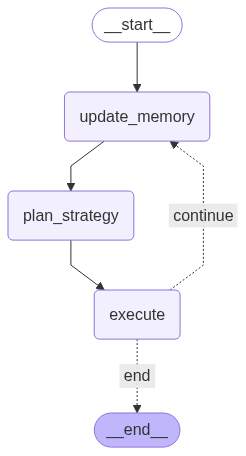

In [14]:
Image(app.get_graph().draw_mermaid_png())

## 🎮 Interactive Game Simulation

Let's watch our AI วิญญาณผู้พิทักษ์ navigate the cursed realm of นครากลับฟ้า through time cycles, making strategic decisions to break the eternal curse.

In [12]:
def run_detailed_simulation():
    """Run a detailed turn-by-turn simulation with Thai dark fantasy narrative"""
    
    # Create initial enhanced state
    initial_state = {
        "player_position": {"x": 0, "y": 0},
        "พลังชีวิต": 60,
        "พลังชีวิตสูงสุด": 100,
        "มานตรา": 40,
        "ประสบการณ์": 0,
        "ระดับ": 1,
        "inventory": [
            {"name": "ยาสมุนไพรโบราณ", "type": "ยาสมุนไพร", "value": 30},
            {"name": "ดาบพระพิฆเนศ", "type": "อาวุธ", "value": 20},
            {"name": "พระเครื่องศักดิ์สิทธิ์", "type": "สมบัติ", "value": 75}
        ],
        "equipped_items": {"weapon": None, "armor": None},
        "current_area": "วัดพระแก้วใต้ดิน",
        "discovered_areas": ["วัดพระแก้วใต้ดิน"],
        "enemies_nearby": [
            {"name": "ผีตายโหง", "health": 25, "attack": 8, "position": {"x": 1, "y": 0}}
        ],
        "short_term_memory": [],
        "long_term_goals": ["ทำลายคำสาปนครากลับฟ้า", "ค้นหาวัดใหญ่", "กลายเป็นเทพผู้พิทักษ์"],
        "completed_objectives": [],
        "current_cycle": 1,
        "cycle_memory": [],
        "curse_progress": 0.3,
        "current_strategy": "",
        "risk_tolerance": 0.5,
        "decision_history": [],
        "game_phase": "exploration",
        "turn_count": 0,
        "messages": []
    }
    
    # Configuration
    config = {"configurable": {"thread_id": "nakara_kalab_fa_adventure_1"}}
    
    print("🌙 === ตำนานนครากลับฟ้า: วัฏจักรกาล ===\n")
    print('"เวลา...ไม่ใช่แค่สิ่งที่ผ่านไป แต่มันย้อนกลับมา…ทวงสิ่งที่เราทำไว้"\n')
    print("📍 จุดเริ่มต้น: วัดพระแก้วใต้ดิน")
    print("🎒 สิ่งของเริ่มต้น: ยาสมุนไพรโบราณ, ดาบพระพิฆเนศ, พระเครื่องศักดิ์สิทธิ์")
    print(f"❤️  พลังชีวิต: {initial_state['พลังชีวิต']}/{initial_state['พลังชีวิตสูงสุด']}")
    print(f"🔮 มานตรา: {initial_state['มานตรา']}")
    print(f"😈 ศัตรูใกล้เคียง: {len(initial_state['enemies_nearby'])} ผีตายโหง")
    print(f"🌀 ความรุนแรงของคำสาป: {initial_state['curse_progress']:.1%}")
    print("\n" + "="*60 + "\n")
    
    try:
        # Create a step-by-step execution to show each turn
        current_state = initial_state.copy()
        
        # We'll manually step through to show each phase
        for turn in range(1, 30):  # Max 30 turns to show multiple cycles
            print(f"🔄 วัฏจักรที่ {current_state['current_cycle']} - เทิร์น {current_state['turn_count'] + 1}")
            print(f"📍 พื้นที่ปัจจุบัน: {current_state['current_area']}")
            print(f"❤️  พลังชีวิต: {current_state['พลังชีวิต']}/{current_state['พลังชีวิตสูงสุด']}")
            print(f"🔮 มานตรา: {current_state['มานตรา']}")
            print(f"🌀 คำสาป: {current_state['curse_progress']:.1%}")
            print(f"🎯 ภารกิจสำเร็จ: {len(current_state['completed_objectives'])}")
            
            # Execute one complete cycle: memory -> strategy -> execute
            current_state = update_memory(current_state)
            current_state = strategic_planning(current_state)
            current_state = execute_strategy(current_state)
            
            # Show what happened this turn
            if current_state['messages']:
                latest_message = current_state['messages'][-1]
                print(f"📝 การกระทำ: {latest_message}")
            
            print(f"🧠 กลยุทธ์: {current_state['current_strategy']} (ความเสี่ยง: {current_state['risk_tolerance']})")
            
            if current_state['completed_objectives']:
                print(f"🏆 ความสำเร็จล่าสุด: {current_state['completed_objectives'][-1]}")
            
            # Check end conditions
            should_end = should_continue(current_state)
            
            if should_end == "end":
                print("\n" + "="*60)
                print("🎊 จบการผจญภัย!")
                break
            
            print("-" * 40)
            
            # Brief pause for readability
            import time
            time.sleep(0.1)
        
        # Final summary
        print("\n🏁 === สรุปการผจญภัยครั้งสุดท้าย ===")
        print(f"🗺️  วัดที่ค้นพบ: {len(current_state['discovered_areas'])} - {current_state['discovered_areas']}")
        print(f"🔄 วัฏจักรที่ผ่านมา: {current_state['current_cycle']}")
        print(f"🌀 ระดับคำสาปสุดท้าย: {current_state['curse_progress']:.1%}")
        print(f"🏆 ภารกิจที่สำเร็จ: {len(current_state['completed_objectives'])}")
        print("📜 รายการความสำเร็จ:")
        for i, obj in enumerate(current_state['completed_objectives'], 1):
            print(f"   {i}. {obj}")
        print(f"\n🎒 สิ่งของสุดท้าย: {len(current_state['inventory'])} ชิ้น")
        print(f"❤️  พลังชีวิตสุดท้าย: {current_state['พลังชีวิต']}/{current_state['พลังชีวิตสูงสุด']}")
        print(f"🔮 มานตราสุดท้าย: {current_state['มานตรา']}")
        print(f"📍 ตำแหน่งสุดท้าย: {current_state['player_position']}")
        print(f"🔄 เทิร์นทั้งหมด: {current_state['turn_count']}")
        
        # Show memory
        if current_state['short_term_memory']:
            print("\n🧠 ความทรงจำล่าสุด:")
            for memory in current_state['short_term_memory'][-3:]:
                print(f"   • {memory}")
        
        return current_state
        
    except Exception as e:
        print(f"💥 การผจญภัยถูกขัดจังหวะ: {e}")
        import traceback
        traceback.print_exc()
        return None

# Run the detailed simulation
final_state = run_detailed_simulation()

🌙 === ตำนานนครากลับฟ้า: วัฏจักรกาล ===

"เวลา...ไม่ใช่แค่สิ่งที่ผ่านไป แต่มันย้อนกลับมา…ทวงสิ่งที่เราทำไว้"

📍 จุดเริ่มต้น: วัดพระแก้วใต้ดิน
🎒 สิ่งของเริ่มต้น: ยาสมุนไพรโบราณ, ดาบพระพิฆเนศ, พระเครื่องศักดิ์สิทธิ์
❤️  พลังชีวิต: 60/100
🔮 มานตรา: 40
😈 ศัตรูใกล้เคียง: 1 ผีตายโหง
🌀 ความรุนแรงของคำสาป: 30.0%


🔄 วัฏจักรที่ 1 - เทิร์น 1
📍 พื้นที่ปัจจุบัน: วัดพระแก้วใต้ดิน
❤️  พลังชีวิต: 60/100
🔮 มานตรา: 40
🌀 คำสาป: 30.0%
🎯 ภารกิจสำเร็จ: 0
📝 การกระทำ: ค้นพบวัดใหม่: วัดมหาธาตุ_1_0
🧠 กลยุทธ์: สำรวจวัด (ความเสี่ยง: 0.7)
🏆 ความสำเร็จล่าสุด: ค้นพบ วัดมหาธาตุ_1_0
----------------------------------------
🔄 วัฏจักรที่ 1 - เทิร์น 2
📍 พื้นที่ปัจจุบัน: วัดมหาธาตุ_1_0
❤️  พลังชีวิต: 60/100
🔮 มานตรา: 40
🌀 คำสาป: 27.0%
🎯 ภารกิจสำเร็จ: 1
📝 การกระทำ: ค้นพบวัดใหม่: วัดเทพ_0_0
🧠 กลยุทธ์: สำรวจวัด (ความเสี่ยง: 0.7)
🏆 ความสำเร็จล่าสุด: ค้นพบ วัดเทพ_0_0
----------------------------------------
🔄 วัฏจักรที่ 1 - เทิร์น 3
📍 พื้นที่ปัจจุบัน: วัดเทพ_0_0
❤️  พลังชีวิต: 60/100
🔮 มานตรา: 40
🌀 คำสาป: 24.0%
🎯 ภารกิจสำเร็จ:

## Exercise

1. Add a new strategy for when the curse level is critically high (ระดับคำสาปสูงมาก)
2. Implement a karma system that affects decision outcomes based on past actions
3. Create a temple blessing mechanism that temporarily boosts player abilities
4. Add a meditation state that allows the player to recover mana but increases curse progression
5. Implement cycle memory persistence to learn from previous time loops